In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
import pandas as pd
import pandas_profiling
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Read the dataset

In [5]:
df = pd.read_csv('bank.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
pandas_profiling.ProfileReport(df)

<br>

# 2. Drop the columns which are unique for all users

In [7]:
df.head() 

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [8]:
# Columns RowNumber, CustomerId and Surname are unique for all customers
# Drop these from the data frame
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

<br>

# 3. Distinguish features and target variable

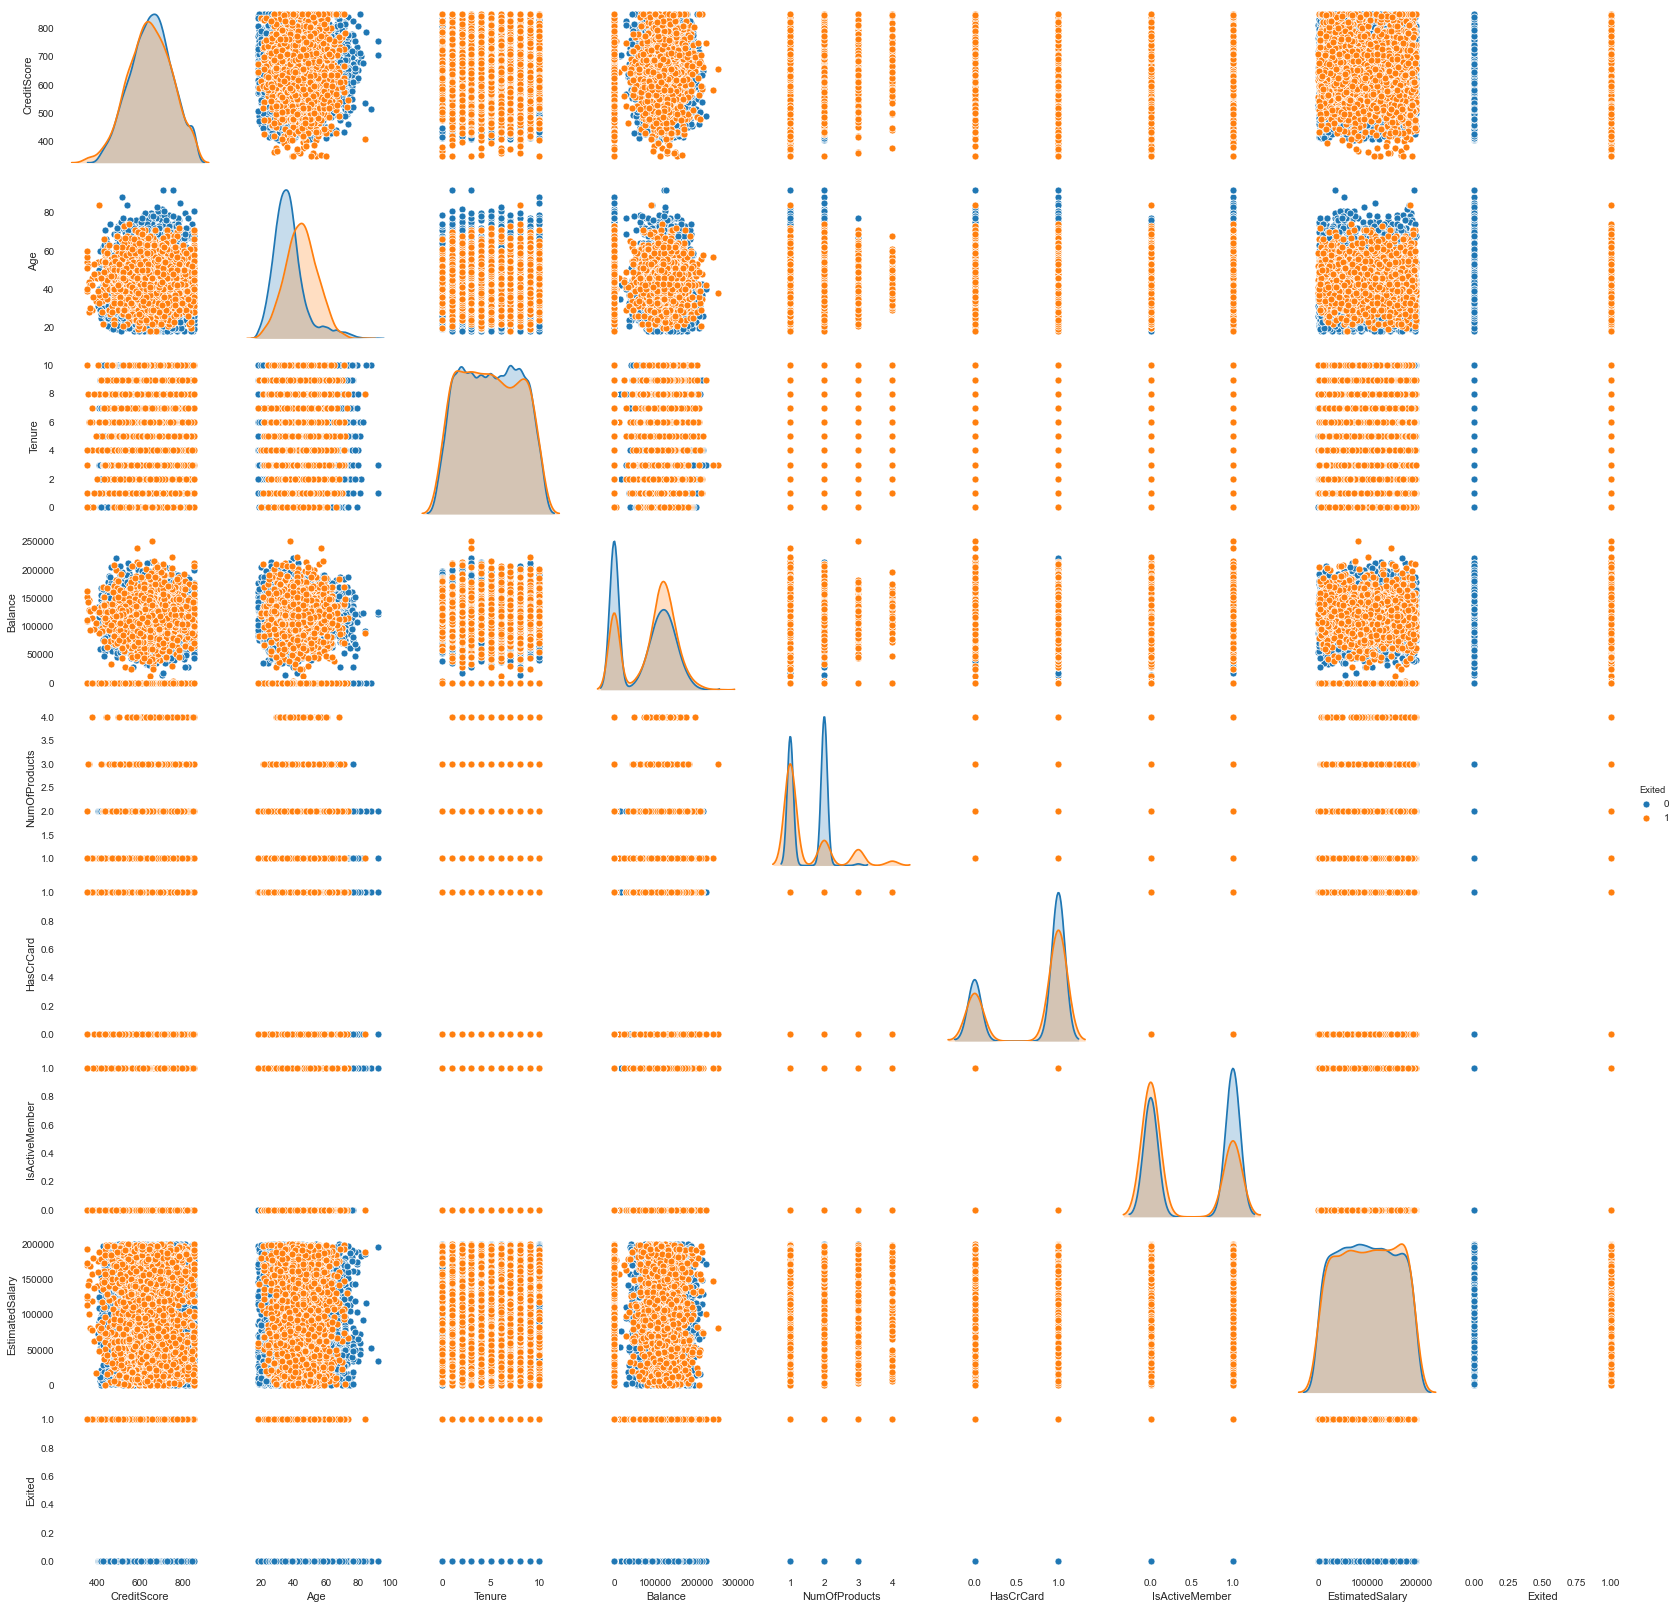

In [18]:
# Target variable is 'Exited'
# We can create a pair plot with hue as Exited to understand the 
# relationship between the features and target variable
sns.pairplot(df, hue='Exited', diag_kind='kde')

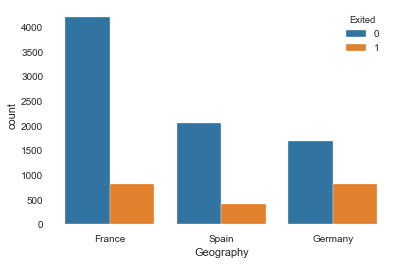

In [31]:
# Count plots for 'Geography' and 'Gender'with hue as 'Exited'
sns.countplot(data=df, x='Geography', hue='Exited');

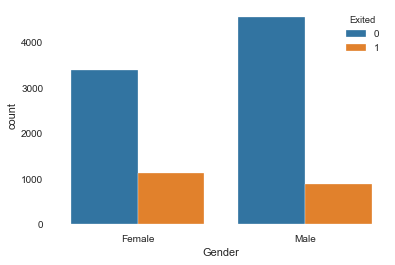

In [32]:
sns.countplot(data=df, x='Gender', hue='Exited');

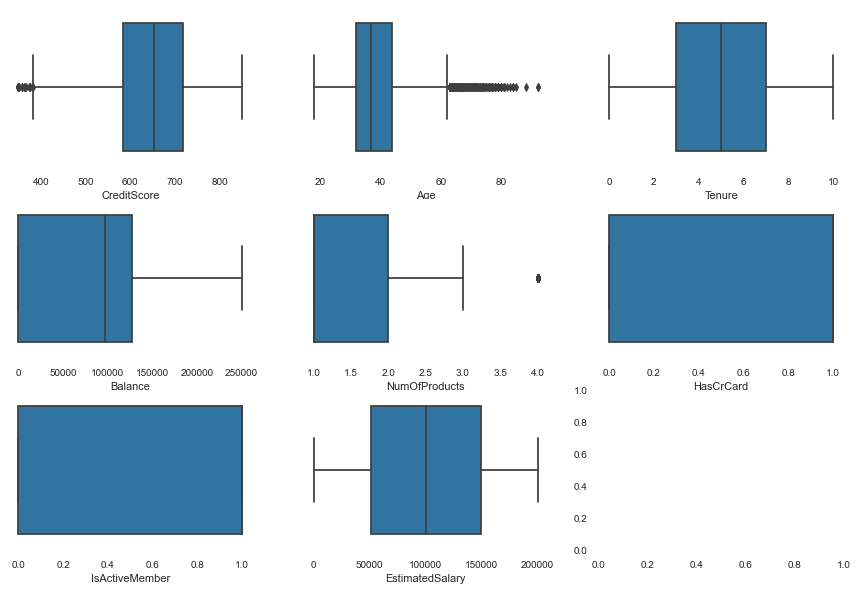

In [26]:
# Outlier detection with Box plots
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize=(15,10))

colIndex = 0 
for col in features:
    sns.boxplot(df[col], ax = axs[math.floor(colIndex/3)][colIndex % 3]);
    colIndex += 1

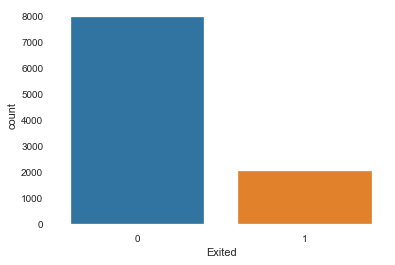

In [21]:
# Check the distribution of target variable
sns.countplot(df['Exited']);

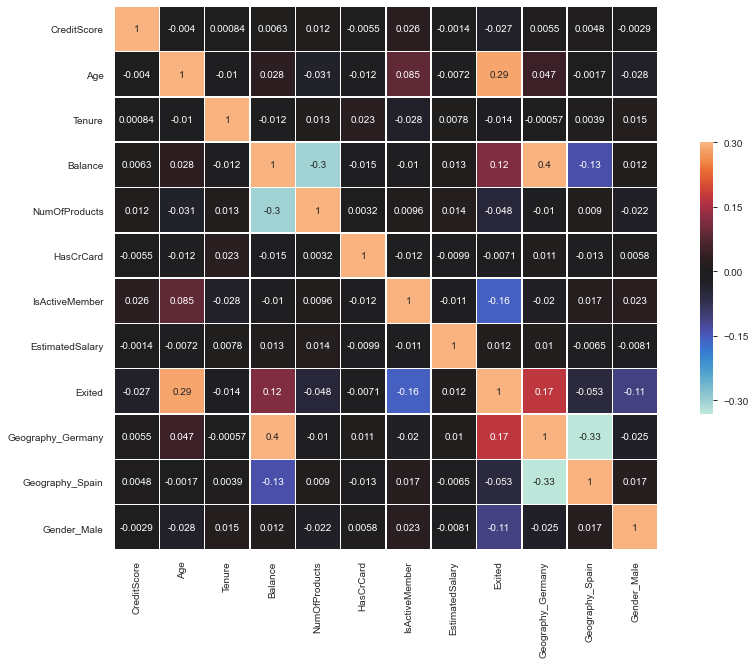

In [32]:
# Plot heatmap to visualize the correlation between the features
plt.figure(figsize = (15,10))
corr = df.corr()
sns.heatmap(corr, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## Insights
<br>
* There are no missing values in the dataset <br>
* Target variable is highly imbalanced <br>
* Based on the KDE plot and heat map, Age, Balance, NoOfProducts, HasCrCard and isActiveMember are good predictors of target <br>
* Based on the count plot, Geography and Gender are good predictors of target <br>


In [11]:
# Convert Geography and Gender to catgegorical columns and one hot encode them
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1                  0   
1               1        112542.58       0                  0   
2               0        113931.57       1                  0   
3               0         93826.63       0                  0   
4               1         79084.10       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            0

# 4. Divide the data set into training and test sets

In [12]:
X = df.drop(columns=['Exited'])
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

# Ceck Shape of test/trainset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 11), (3000, 11), (7000,), (3000,))

# 5. Normalize the train and test data

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
print("X_train")
print(X_train)
print("\nX_test")
print(X_test)

X_train
[[-0.06042858 -0.18527928  1.02868011 ... -0.58350885 -0.57273139
  -1.08628092]
 [-1.74363086  0.00532326  0.33476465 ... -0.58350885 -0.57273139
  -1.08628092]
 [ 0.31132161 -0.18527928  1.72259557 ... -0.58350885 -0.57273139
  -1.08628092]
 ...
 [ 0.22871046  0.57713088  1.37563784 ... -0.58350885 -0.57273139
  -1.08628092]
 [ 0.13577291  0.00532326  1.02868011 ... -0.58350885 -0.57273139
  -1.08628092]
 [ 1.16841234  0.29122707  0.33476465 ...  1.71377008 -0.57273139
   0.92057219]]

X_test
[[-1.03110965  0.76773342 -1.05306628 ... -0.58350885 -0.57273139
   0.92057219]
 [ 0.31132161 -0.47118309 -0.70610855 ... -0.58350885 -0.57273139
   0.92057219]
 [-1.22731114  0.29122707 -1.05306628 ... -0.58350885 -0.57273139
  -1.08628092]
 ...
 [-0.05010219 -1.32889452 -1.74698174 ... -0.58350885 -0.57273139
   0.92057219]
 [-0.38054681 -1.13829198 -0.01219309 ... -0.58350885 -0.57273139
  -1.08628092]
 [ 0.17707849 -0.28058055 -0.70610855 ... -0.58350885  1.74601919
  -1.08628092]]


# 6. Build the model

In [20]:
model = Sequential()

model.add(Dense(64, input_shape = (11,), activation = 'relu'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid')) 

sgd = optimizers.Adam(lr = 0.001)
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

### Summary of the model

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [22]:
model.fit(X_train, y_train.values, epochs = 30, verbose = 0)

# 7. Predict the results

In [23]:
y_pred = model.predict(X_test)
y_pred

array([[0.03091675],
       [0.06258875],
       [0.08530009],
       ...,
       [0.05093917],
       [0.08225533],
       [0.13184822]], dtype=float32)

In [24]:
# Check output with a threshhold of 0.5
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# 8. Accuracy score and confusion matrix

In [25]:
# Evaluate the model
results = model.evaluate(X_test, y_test.values, verbose=0)

In [26]:
# Print Accuracy scores and confusion matrix

y_pred_class = model.predict_classes(X_test, batch_size=1000)

print('Loss: ', results[0])
print('Accuracy: ', results[1])
print('Recall score: ', recall_score(y_test.values, y_pred_class))
print('Precision score: ', precision_score(y_test.values, y_pred_class))
print('F-score: ', f1_score(y_test.values, y_pred_class))

print('\nConfusion Matrix')
confusion_matrix(y_test.values, y_pred_class)

Loss:  0.3458321684996287
Accuracy:  0.86266667
Recall score:  0.4960127591706539
Precision score:  0.7641277641277642
F-score:  0.6015473887814312

Confusion Matrix


array([[2277,   96],
       [ 316,  311]])

## Identify the points of improvement

In [27]:
# Create a data frame to hold results of various models
column_names = ['Optimizer', 'Learning Rate', 'Epoch', 'Accuracy', 'Log Loss']
modelsDf = pd.DataFrame(columns = column_names)

In [30]:
def createModel(optimizer, learningRate):
    model = Sequential()
    model.add(Dense(64, input_shape = (11,), activation = 'relu'))
    model.add(Dense(32, activation = 'tanh'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    if optimizer == 'Adam':
      opt = optimizers.Adam(learningRate)
    elif optimizer=='SGD':
      opt = optimizers.SGD(learningRate)
    elif optimizer=='RMSprop':
      opt = optimizers.RMSprop(learningRate)
        
    model.compile(opt, loss = 'binary_crossentropy', metrics=['accuracy'])
    return model

In [31]:
# Create and run various models varying the optimizer, learning rate and epoch
opts=['Adam','SGD','RMSprop']
learningRates = [0.01, 0.001]
index = 0
for opt in opts:
    for lr in learningRates:
        for epoch in np.arange(20,50,10):
        
            model = createModel(opt, lr)
            model.fit(X_train, y_train.values, batch_size = 1000, epochs=epoch, verbose = 0)
            results = model.evaluate(X_test, y_test.values, verbose=0)
            modelsDf.loc[index] = [opt, lr, epoch, results[1], results[0]]
            index += 1

modelsDf

Optimizer  Learning Rate Epoch  Accuracy  Log Loss
0       Adam          0.010    20  0.860667  0.344784
1       Adam          0.010    30  0.860000  0.351871
2       Adam          0.010    40  0.861667  0.351856
3       Adam          0.001    20  0.830000  0.402230
4       Adam          0.001    30  0.851333  0.355690
5       Adam          0.001    40  0.857333  0.352758
6        SGD          0.010    20  0.791333  0.473972
7        SGD          0.010    30  0.791000  0.478214
8        SGD          0.010    40  0.791667  0.465081
9        SGD          0.001    20  0.653000  0.654325
10       SGD          0.001    30  0.651667  0.662908
11       SGD          0.001    40  0.755000  0.582562
12   RMSprop          0.010    20  0.854667  0.347747
13   RMSprop          0.010    30  0.861000  0.340844
14   RMSprop          0.010    40  0.858333  0.353788
15   RMSprop          0.001    20  0.842000  0.380186
16   RMSprop          0.001    30  0.856000  0.352786
17   RMSprop          0.001    40  0.862333  0.348532

## Insights

* Various hyper parameters like optimizer, learning rate and epoch can be tuned to get the best performance <br>
* The following model parameters gave the best accuracy and good log loss<br>
* RMSprop &nbsp;&nbsp;	0.001 &nbsp;&nbsp;	40 &nbsp;&nbsp;	0.862333 &nbsp;&nbsp;	0.348532